In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm

In [13]:
path = os.getcwd()

In [14]:
experiment = 'Sundials_CVODE-GMRES'
n_particles = np.logspace(0, 6, 7).astype(int)
datasets = {f'nparticles_{str(n)}': {'host': '', 'device': ''} for n in n_particles}

In [15]:
for n in n_particles:
    subdir_path = os.path.join(path, experiment, f'nparticles_{str(n)}')

    files = os.listdir(subdir_path)

    for file in files:
        if file.endswith('Cuda.memspace_usage'):
            datasets[f'nparticles_{str(n)}']['device'] = pd.read_csv(f'{subdir_path}/{file}', comment='#', sep='\\s+', 
                             names = ['Time(s)', 'Size(MB)', 'HighWater(MB)', 'HighWater-Process(MB)'])
        if file.endswith('Host.memspace_usage'):
            datasets[f'nparticles_{str(n)}']['host'] = pd.read_csv(f'{subdir_path}/{file}', comment='#', sep='\\s+', 
                             names = ['Time(s)', 'Size(MB)', 'HighWater(MB)', 'HighWater-Process(MB)'])
        if file.endswith('.mem_events'):
            pass
            #df = pd.read_csv(f'{subdir_path}/{file}', comment='#', sep='\\s+', )


    

Text(0.5, 0, 'Wall time (s)')

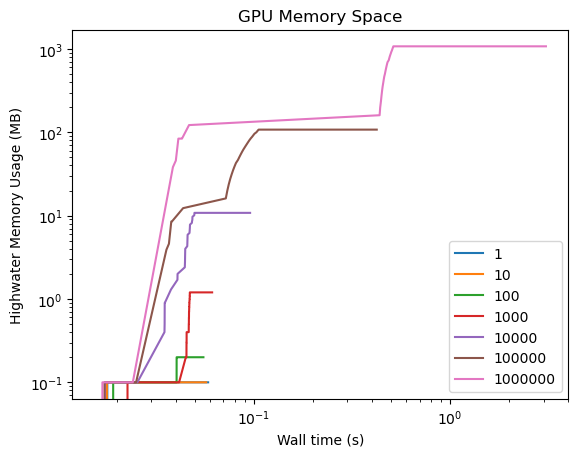

In [59]:
for n in n_particles:
    df = datasets[f'nparticles_{str(n)}']['device']
    plt.plot(df['Time(s)'], df['HighWater(MB)'], label=n)
    

plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.title('GPU Memory Space')
plt.ylabel('Highwater Memory Usage (MB)')
plt.xlabel('Wall time (s)')

Text(0.5, 0, 'Wall time (s)')

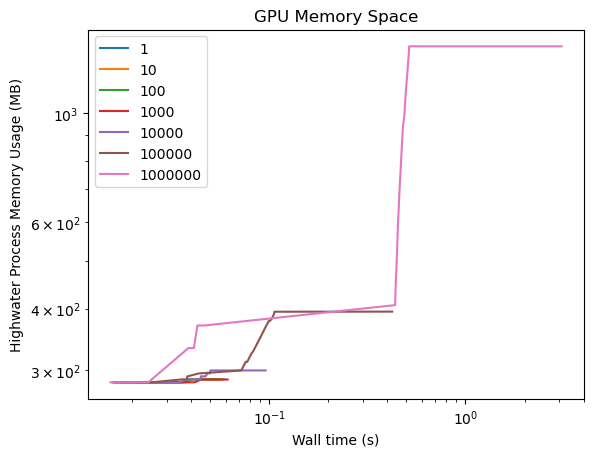

In [58]:
for n in n_particles:
    df = datasets[f'nparticles_{str(n)}']['device']
    plt.plot(df['Time(s)'], df['HighWater-Process(MB)'], label=n)
    

plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.title('GPU Memory Space')
plt.ylabel('Highwater Process Memory Usage (MB)')
plt.xlabel('Wall time (s)')

In [19]:
n = 1
highwater_list = np.zeros((n_particles.size))

for i, n in enumerate(n_particles):
    df = datasets[f'nparticles_{str(n)}']['device']
    global_highwater = df['HighWater-Process(MB)'].max()
    highwater_list[i] = global_highwater

Text(0, 0.5, 'HighWater-Process(MB) Max')

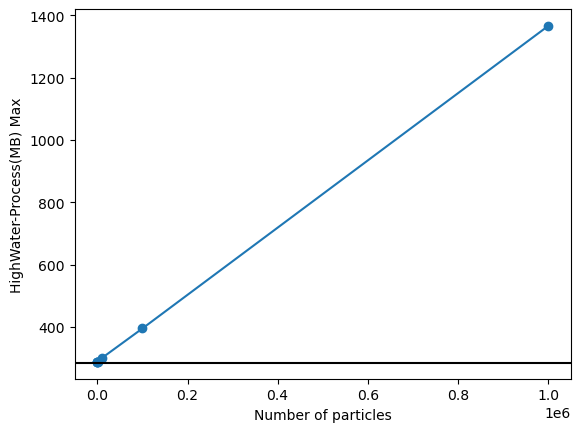

In [20]:
plt.plot(n_particles, highwater_list, marker='o')
#plt.xscale('log')
#plt.yscale('log')

highwater_baseline = 283.6
plt.axhline(highwater_baseline, xmin=0, xmax=1, c='k')

plt.xlabel('Number of particles')
plt.ylabel('HighWater-Process(MB) Max')

In [6]:
X = sm.add_constant(n_particles)
y = highwater_list
model = sm.OLS(y, X)
results = model.fit()

In [14]:
intercept = results.params[0]
slope = results.params[1]

print('Intercept:', intercept)
print('Slope (MB/particle):', slope)

Intercept: 287.4345649693121
Slope (MB/particle): 0.001078432348536571


In [ ]:
1/slope # particles per MBs

np.float64(927.2718880855128)

## Plots for Sundials-CVODE (dense)

In [59]:
experiment = 'Sundials_CVODE-Dense'
n_particles = np.array([1, 2, 4, 8, 18, 37, 78, 335, 695, 1000])
datasets = {f'nparticles_{str(n)}': {'host': '', 'device': ''} for n in n_particles}

In [60]:
for n in n_particles:
    subdir_path = os.path.join(path, experiment, f'nparticles_{str(n)}')

    files = os.listdir(subdir_path)

    for file in files:
        if file.endswith('Cuda.memspace_usage'):
            datasets[f'nparticles_{str(n)}']['device'] = pd.read_csv(f'{subdir_path}/{file}', comment='#', sep='\\s+', 
                             names = ['Time(s)', 'Size(MB)', 'HighWater(MB)', 'HighWater-Process(MB)'])
        if file.endswith('Host.memspace_usage'):
            datasets[f'nparticles_{str(n)}']['host'] = pd.read_csv(f'{subdir_path}/{file}', comment='#', sep='\\s+', 
                             names = ['Time(s)', 'Size(MB)', 'HighWater(MB)', 'HighWater-Process(MB)'])
        if file.endswith('.mem_events'):
            pass
            #df = pd.read_csv(f'{subdir_path}/{file}', comment='#', sep='\\s+', )

In [61]:
n = 1
highwater_list = np.zeros((n_particles.size))

for i, n in enumerate(n_particles):
    df = datasets[f'nparticles_{str(n)}']['device']
    global_highwater = df['HighWater(MB)'].max()
    highwater_list[i] = global_highwater

Note for some reason that the HighWater Process isn't really changing much when the HighWater value increases through N_p = 335 (HighWater goes to around 70MB but the Process remains around 280 MB)

Memory allocation for the Sundials-CVODE (dense) solver increases quadradically owing to the `sunmat_view` and `JacRL` matrices

Text(0, 0.5, 'HighWater(MB) Max')

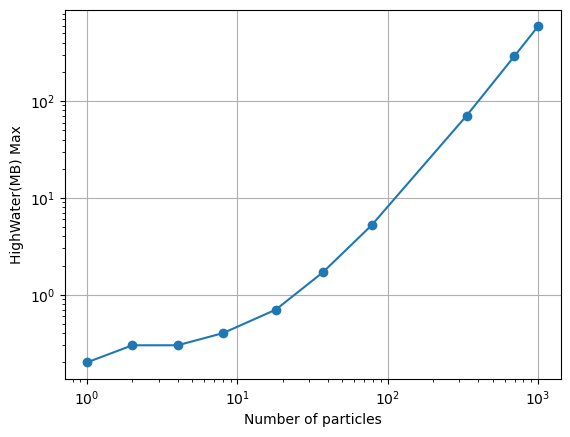

In [64]:
plt.plot(n_particles, highwater_list, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.xlabel('Number of particles')
plt.ylabel('HighWater(MB) Max')

In [33]:
np.log10(78)/np.log10(37)

np.float64(1.2065377646591902)

In [34]:
np.log10(335)/np.log10(78)

np.float64(1.334523550485444)

In [42]:
np.log10(n_particles[1:])/np.log10(n_particles[:-1])

/tmp/ipykernel_818102/3203489619.py:1: RuntimeWarning: divide by zero encountered in divide
  np.log10(n_particles[1:])/np.log10(n_particles[:-1])


array([       inf, 2.        , 1.5       , 1.389975  , 1.24929186,
       1.20653776, 1.33452355])

In [52]:
np.log2(n_particles[1:]/n_particles[:-1])

array([1.        , 1.        , 1.        , 1.169925  , 1.03952836,
       1.07594885, 2.10261507])

In [51]:
32*10**.30103

64.00000063897934